___



Here are what the columns represent:
* credit.policy: 1 if the customer meets the credit underwriting criteria of LendingClub.com, and 0 otherwise.
* purpose: The purpose of the loan (takes values "credit_card", "debt_consolidation", "educational", "major_purchase", "small_business", and "all_other").
* int.rate: The interest rate of the loan, as a proportion (a rate of 11% would be stored as 0.11). Borrowers judged by LendingClub.com to be more risky are assigned higher interest rates.
* installment: The monthly installments owed by the borrower if the loan is funded.
* log.annual.inc: The natural log of the self-reported annual income of the borrower.
* dti: The debt-to-income ratio of the borrower (amount of debt divided by annual income).
* fico: The FICO credit score of the borrower.
* days.with.cr.line: The number of days the borrower has had a credit line.
* revol.bal: The borrower's revolving balance (amount unpaid at the end of the credit card billing cycle).
* revol.util: The borrower's revolving line utilization rate (the amount of the credit line used relative to total credit available).
* inq.last.6mths: The borrower's number of inquiries by creditors in the last 6 months.
* delinq.2yrs: The number of times the borrower had been 30+ days past due on a payment in the past 2 years.
* pub.rec: The borrower's number of derogatory public records (bankruptcy filings, tax liens, or judgments).

# Import Libraries



In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Get the Data



In [34]:
loans = pd.read_csv('Loan.csv')

In [35]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 234 entries, 0 to 233
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      234 non-null    int64  
 1   purpose            234 non-null    object 
 2   int.rate           234 non-null    float64
 3   installment        234 non-null    float64
 4   log.annual.inc     234 non-null    float64
 5   dti                234 non-null    float64
 6   fico               234 non-null    int64  
 7   days.with.cr.line  234 non-null    float64
 8   revol.bal          234 non-null    int64  
 9   revol.util         234 non-null    float64
 10  inq.last.6mths     234 non-null    int64  
 11  delinq.2yrs        234 non-null    int64  
 12  pub.rec            234 non-null    int64  
 13  not.fully.paid     234 non-null    int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 25.7+ KB


In [36]:
loans.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,234.000000,234.000000,234.000000,234.000000,234.000000,234.000000,234.000000,234.000000,234.000000,234.000000,234.000000,234.000000,234.000000
mean,0.944444,0.106535,252.341838,11.004581,10.398761,718.089744,4714.088853,17204.141026,42.624786,1.132479,0.128205,0.068376,0.273504
std,0.229552,0.023618,190.333497,0.706798,6.675002,42.607960,2807.337484,25829.559727,29.306499,1.439619,0.425344,0.252931,0.446713
min,0.000000,0.071200,15.690000,8.987197,0.000000,627.000000,1110.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.087000,127.487500,10.551835,4.620000,682.000000,2700.208333,3004.500000,16.750000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.103900,187.235000,11.034890,9.835000,712.000000,4175.000000,7578.000000,40.050000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.121200,315.862500,11.429576,15.747500,752.000000,5939.750000,22001.000000,68.675000,2.000000,0.000000,0.000000,1.000000
max,1.000000,0.201100,902.540000,13.331002,28.060000,822.000000,16259.041670,215372.000000,98.500000,8.000000,4.000000,1.000000,1.000000


In [37]:
loans

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
229,1,all_other,0.1253,127.18,11.002100,20.14,687,4140.041667,27759,71.7,1,0,0,1
230,1,credit_card,0.1158,264.11,10.341484,6.89,712,5670.041667,11025,55.1,1,0,1,1
231,1,debt_consolidation,0.0963,320.95,10.308953,15.88,762,3630.000000,4532,33.6,0,0,0,1
232,1,debt_consolidation,0.0800,188.02,11.429587,5.07,752,8162.958333,21365,39.4,0,0,0,1


# Exploratory Data Analysis

Let's do some data visualization! We'll use seaborn and pandas built-in plotting capabilities



<AxesSubplot:xlabel='not.fully.paid', ylabel='Count'>

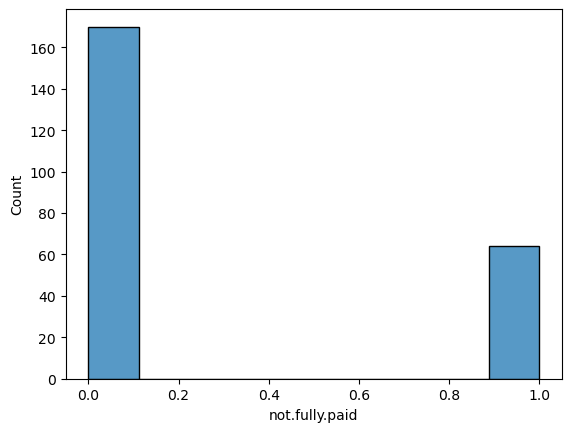

In [38]:
sns.histplot(loans["not.fully.paid"])


Text(0.5, 0, 'FICO')

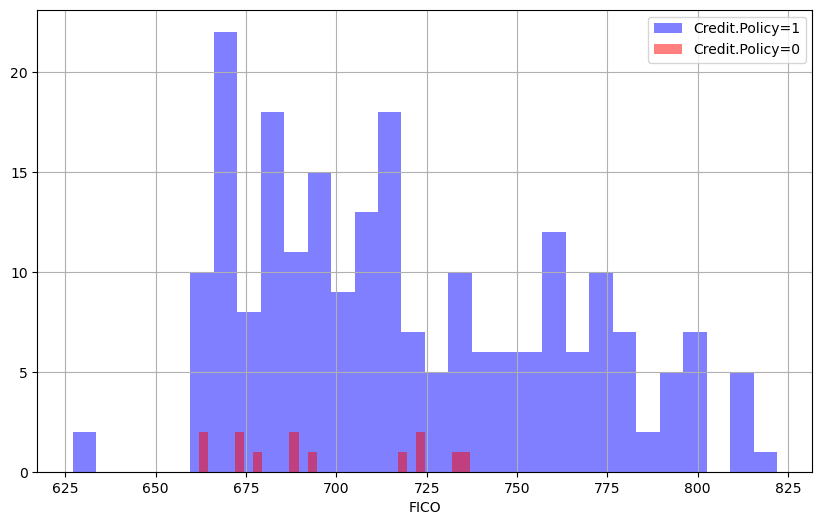

In [39]:
plt.figure(figsize=(10,6))
loans[loans['credit.policy']==1]['fico'].hist(alpha=0.5,color='blue',
                                              bins=30,label='Credit.Policy=1')
loans[loans['credit.policy']==0]['fico'].hist(alpha=0.5,color='red',
                                              bins=30,label='Credit.Policy=0')
plt.legend()
plt.xlabel('FICO')

** Create a similar figure, except this time select by the not.fully.paid column.**

Text(0.5, 0, 'FICO')

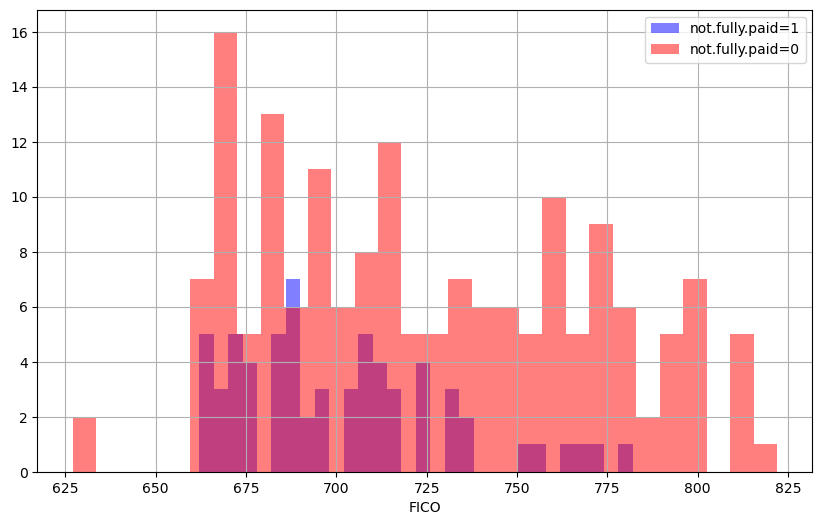

In [40]:
plt.figure(figsize=(10,6))
loans[loans['not.fully.paid']==1]['fico'].hist(alpha=0.5,color='blue',
                                              bins=30,label='not.fully.paid=1')
loans[loans['not.fully.paid']==0]['fico'].hist(alpha=0.5,color='red',
                                              bins=30,label='not.fully.paid=0')
plt.legend()
plt.xlabel('FICO')

** Create a countplot using seaborn showing the counts of loans by purpose, with the color hue defined by not.fully.paid. **

<AxesSubplot:xlabel='purpose', ylabel='count'>

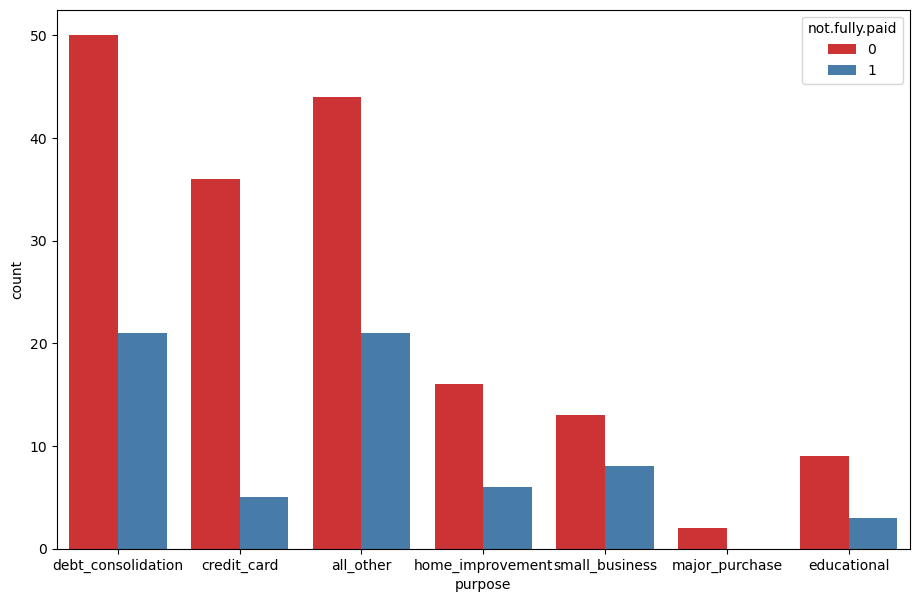

In [41]:
plt.figure(figsize=(11,7))
sns.countplot(x='purpose',hue='not.fully.paid',data=loans,palette='Set1')

** Let's see the trend between FICO score and interest rate. Recreate the following jointplot.**

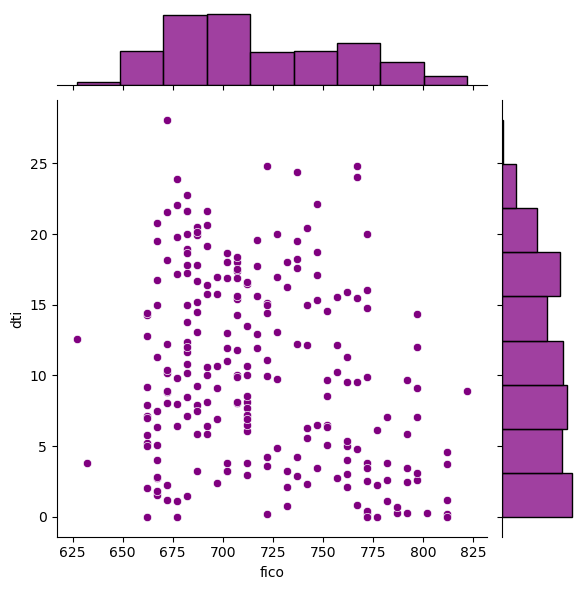

In [42]:
sns.jointplot(x='fico',y='dti',data=loans,color='purple')

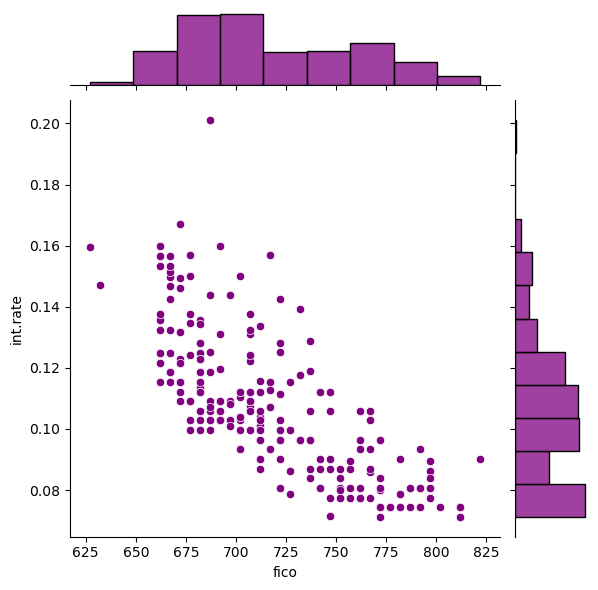

In [43]:
sns.jointplot(x='fico',y='int.rate',data=loans,color='purple')

** Create the following lmplots to see if the trend differed between not.fully.paid and credit.policy. 

<Figure size 1100x700 with 0 Axes>

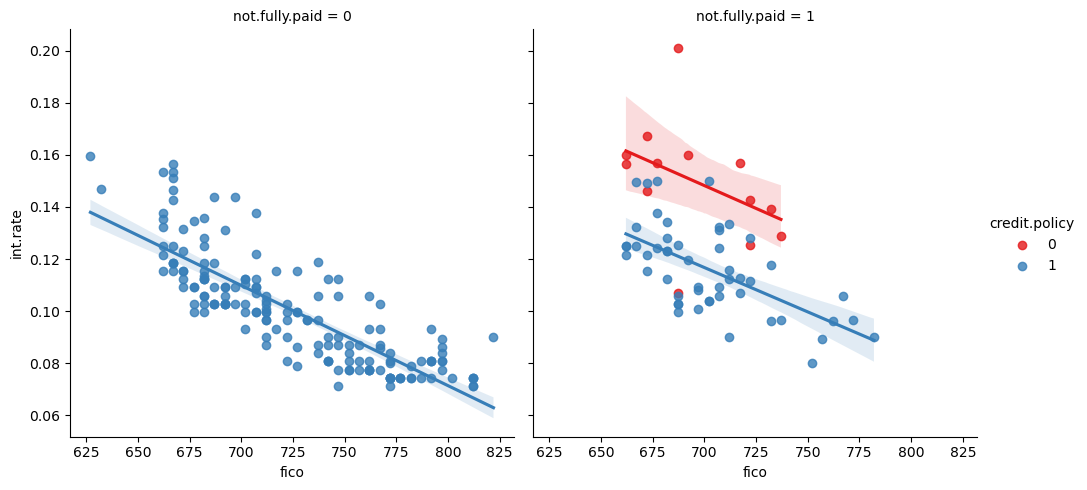

In [44]:
plt.figure(figsize=(11,7))
sns.lmplot(y='int.rate',x='fico',data=loans,hue='credit.policy',
           col='not.fully.paid',palette='Set1')

# Setting up the Data

Let's get ready to set up our data for our Random Forest Classification Model!

**Check loans.info() again.**

In [45]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 234 entries, 0 to 233
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      234 non-null    int64  
 1   purpose            234 non-null    object 
 2   int.rate           234 non-null    float64
 3   installment        234 non-null    float64
 4   log.annual.inc     234 non-null    float64
 5   dti                234 non-null    float64
 6   fico               234 non-null    int64  
 7   days.with.cr.line  234 non-null    float64
 8   revol.bal          234 non-null    int64  
 9   revol.util         234 non-null    float64
 10  inq.last.6mths     234 non-null    int64  
 11  delinq.2yrs        234 non-null    int64  
 12  pub.rec            234 non-null    int64  
 13  not.fully.paid     234 non-null    int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 25.7+ KB


## Categorical Features

Notice that the **purpose** column as categorical

That means we need to transform them using dummy variables so sklearn will be able to understand them.
Let's show you a way of dealing with these columns that can be expanded to multiple categorical features if necessary.

**Create a list of 1 element containing the string 'purpose'

In [46]:
cat_feats = ['purpose']

In [47]:
final_data = pd.get_dummies(loans,columns=cat_feats,drop_first=True)

In [48]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 234 entries, 0 to 233
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   credit.policy               234 non-null    int64  
 1   int.rate                    234 non-null    float64
 2   installment                 234 non-null    float64
 3   log.annual.inc              234 non-null    float64
 4   dti                         234 non-null    float64
 5   fico                        234 non-null    int64  
 6   days.with.cr.line           234 non-null    float64
 7   revol.bal                   234 non-null    int64  
 8   revol.util                  234 non-null    float64
 9   inq.last.6mths              234 non-null    int64  
 10  delinq.2yrs                 234 non-null    int64  
 11  pub.rec                     234 non-null    int64  
 12  not.fully.paid              234 non-null    int64  
 13  purpose_credit_card         234 non

In [49]:
final_data

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,0,1,0,0,0,0
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0,1,0,0,0,0,0
2,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,0,1,0,0,0,0
3,1,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,0,1,0,0,0,0
4,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
229,1,0.1253,127.18,11.002100,20.14,687,4140.041667,27759,71.7,1,0,0,1,0,0,0,0,0,0
230,1,0.1158,264.11,10.341484,6.89,712,5670.041667,11025,55.1,1,0,1,1,1,0,0,0,0,0
231,1,0.0963,320.95,10.308953,15.88,762,3630.000000,4532,33.6,0,0,0,1,0,1,0,0,0,0
232,1,0.0800,188.02,11.429587,5.07,752,8162.958333,21365,39.4,0,0,0,1,0,1,0,0,0,0


## Train Test Split

Now its time to split our data into a training set and a testing set!



In [50]:
from sklearn.model_selection import train_test_split

In [51]:
X = final_data.drop('not.fully.paid',axis=1)
y = final_data['not.fully.paid']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

## Training a Decision Tree Model

Let's start by training a single decision tree first!

** Import DecisionTreeClassifier**

In [52]:
from sklearn.tree import DecisionTreeClassifier

**Create an instance of DecisionTreeClassifier() called dtree and fit it to the training data.**

In [53]:
dtree = DecisionTreeClassifier()

In [54]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

## Predictions and Evaluation of Decision Tree
**Create predictions from the test set and create a classification report and a confusion matrix.**

In [108]:
predictions = dtree.predict(X_test)

In [109]:
from sklearn.metrics import classification_report,confusion_matrix,roc_auc_score

In [110]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       1.00      0.92      0.96        53
           1       0.82      1.00      0.90        18

    accuracy                           0.94        71
   macro avg       0.91      0.96      0.93        71
weighted avg       0.95      0.94      0.95        71



In [111]:
print(confusion_matrix(y_test,predictions))
print(roc_auc_score(y_test,predictions))

[[49  4]
 [ 0 18]]
0.9622641509433962


In [112]:
from six import StringIO 
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
features = list(final_data.columns[1:])
features

['int.rate',
 'installment',
 'log.annual.inc',
 'dti',
 'fico',
 'days.with.cr.line',
 'revol.bal',
 'revol.util',
 'inq.last.6mths',
 'delinq.2yrs',
 'pub.rec',
 'not.fully.paid',
 'purpose_credit_card',
 'purpose_debt_consolidation',
 'purpose_educational',
 'purpose_home_improvement',
 'purpose_major_purchase',
 'purpose_small_business']

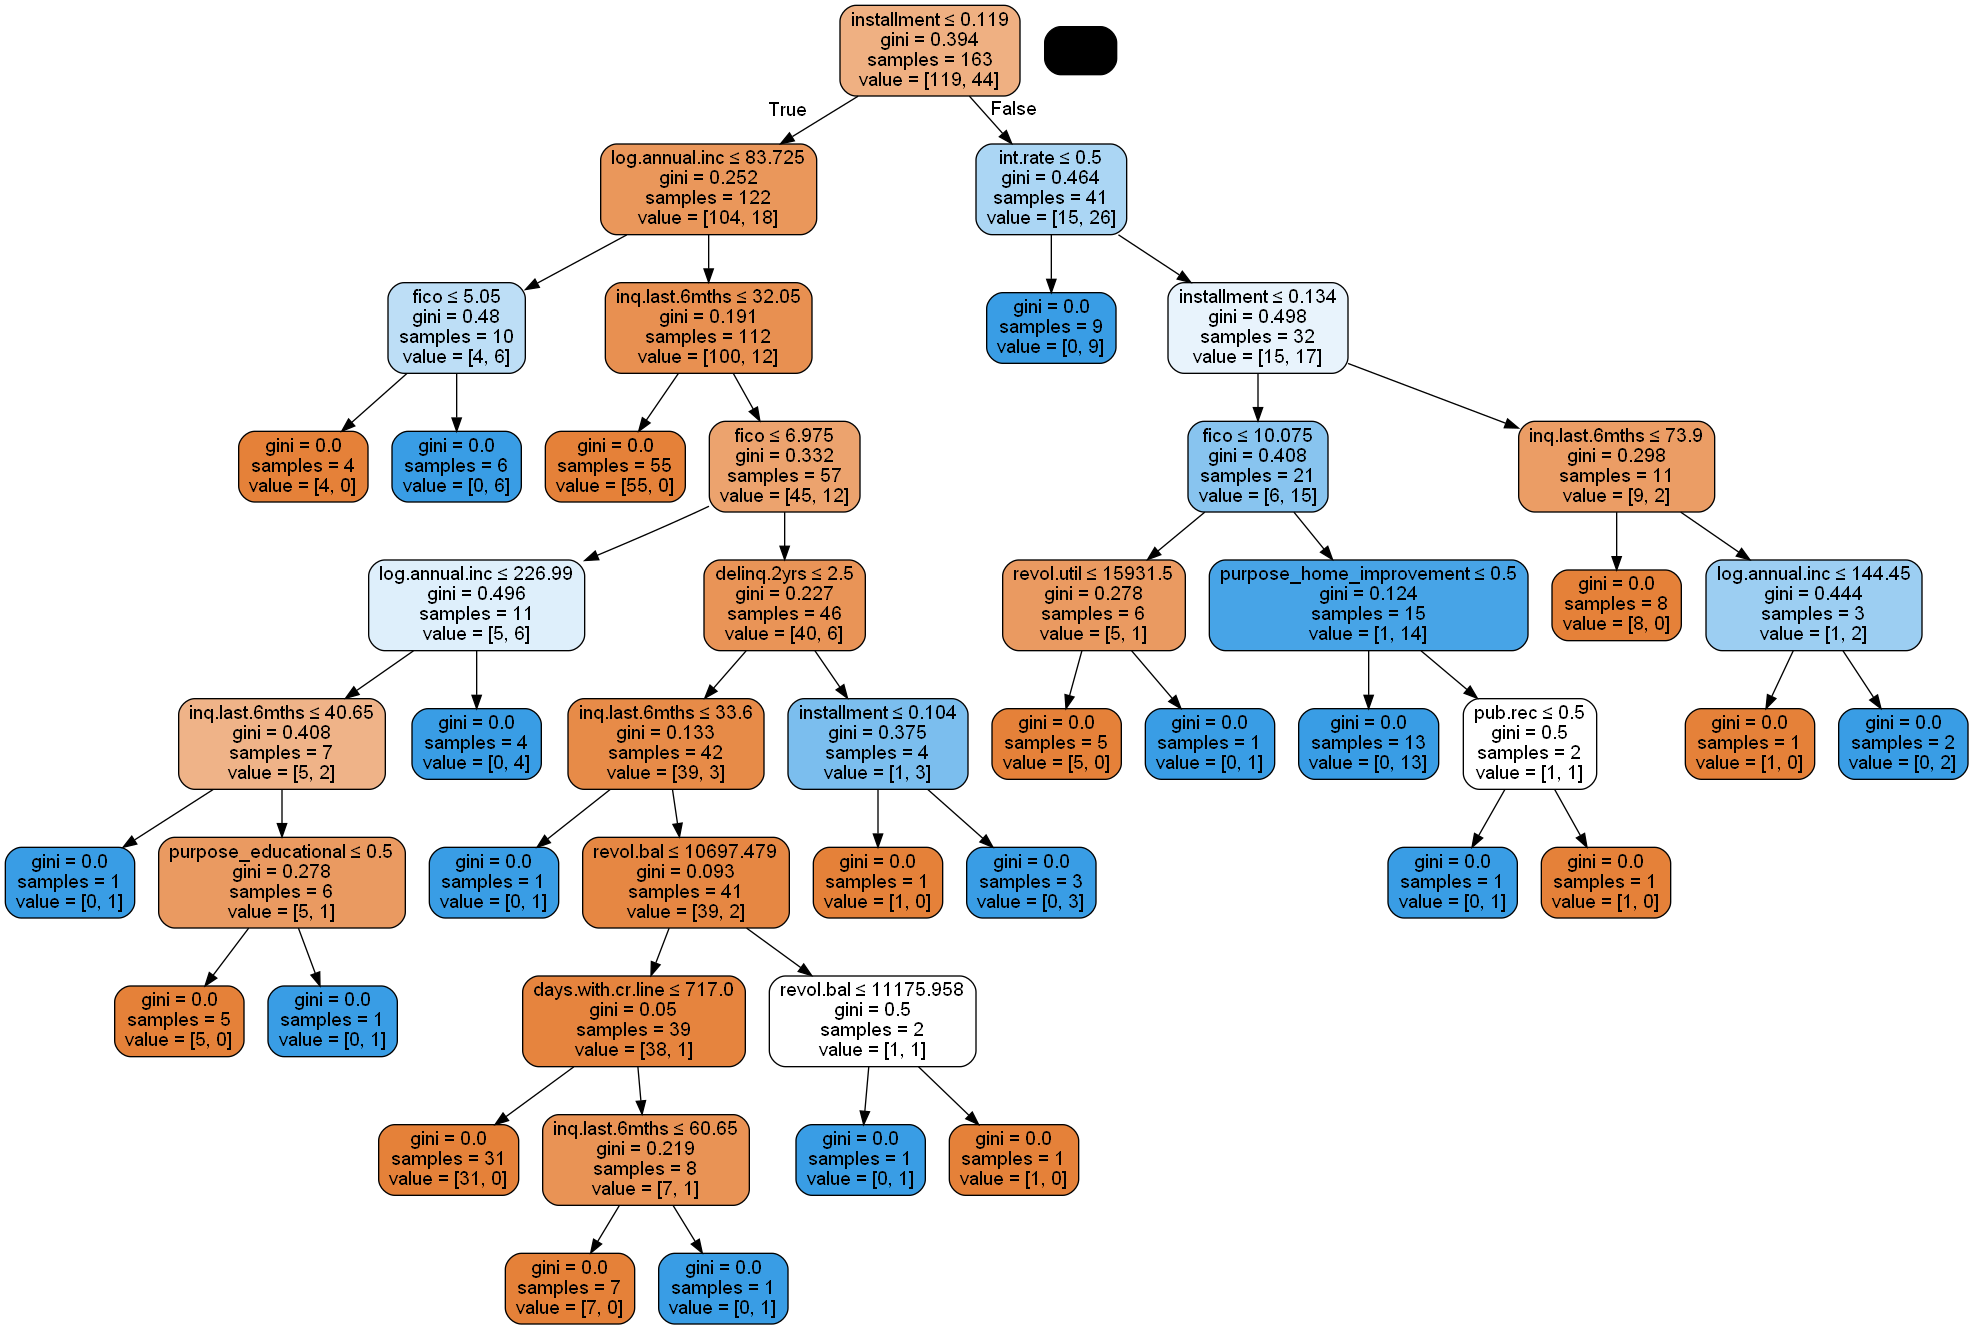

In [113]:
dot_data = StringIO()
export_graphviz(dtree, out_file=dot_data,feature_names=features,filled=True,rounded=True,special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

## Training the Random Forest model

Now its time to train our model!

**Create an instance of the RandomForestClassifier class and fit it to our training data from the previous step.**

In [114]:
from sklearn.ensemble import RandomForestClassifier

In [115]:
rfc = RandomForestClassifier(n_estimators=600)

In [116]:
rfc.fit(X_train,y_train)

RandomForestClassifier(n_estimators=600)

## Predictions and Evaluation

Let's predict off the y_test values and evaluate our model.

** Predict the class of not.fully.paid for the X_test data.**

In [117]:
predictions = rfc.predict(X_test)

**Now create a classification report from the results. 

In [118]:
from sklearn.metrics import classification_report,confusion_matrix

In [119]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.88      0.85      0.87        53
           1       0.60      0.67      0.63        18

    accuracy                           0.80        71
   macro avg       0.74      0.76      0.75        71
weighted avg       0.81      0.80      0.81        71



**Show the Confusion Matrix for the predictions.**

In [120]:
print(confusion_matrix(y_test,predictions))
print(roc_auc_score(y_test,predictions))

[[45  8]
 [ 6 12]]
0.7578616352201257


# LightGBM

In [121]:
from lightgbm import LGBMClassifier

In [122]:
lg = LGBMClassifier(n_estimators=600)

In [123]:
lg.fit(X_train,y_train)

[LightGBM] [Info] Number of positive: 46, number of negative: 117
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000049 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 376
[LightGBM] [Info] Number of data points in the train set: 163, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.282209 -> initscore=-0.933533
[LightGBM] [Info] Start training from score -0.933533
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

LGBMClassifier(n_estimators=600)

In [124]:
y_pred = lg.predict(X_test)

In [125]:
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(roc_auc_score(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.85      0.77      0.81        53
           1       0.48      0.61      0.54        18

    accuracy                           0.73        71
   macro avg       0.67      0.69      0.67        71
weighted avg       0.76      0.73      0.74        71

[[41 12]
 [ 7 11]]
0.6923480083857443


# XGBoost

In [126]:
from sklearn.ensemble import GradientBoostingClassifier

In [127]:
xg = GradientBoostingClassifier()

In [128]:
xg.fit(X_train,y_train)

GradientBoostingClassifier()

In [129]:
pred_y = xg.predict(X_test)

In [130]:
print(classification_report(y_test,pred_y))
print(confusion_matrix(y_test,pred_y))
print(roc_auc_score(y_test,pred_y))

              precision    recall  f1-score   support

           0       0.90      0.87      0.88        53
           1       0.65      0.72      0.68        18

    accuracy                           0.83        71
   macro avg       0.78      0.80      0.78        71
weighted avg       0.84      0.83      0.83        71

[[46  7]
 [ 5 13]]
0.7950733752620546


**What performed better the random forest or the decision tree?**

In [78]:
# Depends what metric you are trying to optimize for. 
# Notice the recall for each class for the models.
# Neither did very well, more feature engineering is needed.

# Logostic Regression

In [142]:
from sklearn.linear_model import LogisticRegression

In [143]:
lg = LogisticRegression()

In [144]:
lg.fit(X_train,y_train)

C:\Users\Aakash\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [145]:
y_pred = lg.predict(X_test)

In [146]:
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.82      0.94      0.88        53
           1       0.70      0.39      0.50        18

    accuracy                           0.80        71
   macro avg       0.76      0.67      0.69        71
weighted avg       0.79      0.80      0.78        71

[[50  3]
 [11  7]]


In [147]:
lg.intercept_

array([0.00117791])

In [148]:
lg.coef_

array([[-2.00040516e-02,  1.69476543e-03,  4.31714378e-04,
        -2.16097616e-03, -4.86456862e-03, -3.15141601e-03,
         1.63435308e-05,  3.65925742e-06,  1.92930338e-02,
         2.01601321e-01, -1.65016219e-02,  9.41181058e-03,
        -2.27167309e-02,  2.13641584e-03, -8.32042236e-05,
         5.48796181e-03, -1.84693373e-03,  1.13980870e-02]])

In [149]:
X_train

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
168,1,0.1028,116.64,10.308953,7.88,687,5130.041667,7600,71.7,0,0,1,0,0,0,0,0,0
220,1,0.1241,200.47,10.778956,17.53,707,6509.958333,1966,93.6,1,0,0,0,0,0,0,0,0
59,1,0.0964,205.45,11.002100,7.72,712,2293.958333,3362,69.3,0,0,0,0,0,0,0,0,0
178,1,0.1186,397.77,11.918391,20.48,687,4452.041667,66654,51.6,1,0,0,0,1,0,0,0,0
17,1,0.0894,476.58,11.608236,7.07,797,6510.958333,7586,52.7,1,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123,1,0.1122,328.43,10.308953,20.40,742,3270.000000,0,0.0,3,0,0,0,0,0,0,0,0
65,1,0.1059,32.55,10.433822,14.47,687,1110.000000,4485,36.9,1,0,0,0,0,0,0,0,0
69,1,0.0775,156.11,12.323856,6.48,752,5339.958333,2160,2.3,1,0,0,0,0,0,1,0,0
121,1,0.1122,217.59,10.952559,13.77,682,2160.000000,11490,95.7,0,0,0,0,1,0,0,0,0


In [150]:
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score,mean_absolute_error

In [151]:
X = final_data.drop('not.fully.paid',axis=1)
y = final_data['not.fully.paid']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=16)

In [152]:
step1 =  LogisticRegression()

pipe =Pipeline([
    ('step1',step1)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(roc_auc_score(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.82      0.94      0.88        53
           1       0.70      0.39      0.50        18

    accuracy                           0.80        71
   macro avg       0.76      0.67      0.69        71
weighted avg       0.79      0.80      0.78        71

[[50  3]
 [11  7]]
0.6661425576519917


C:\Users\Aakash\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [153]:
import pickle
pickle.dump(final_data,open('df.pkl','wb'))
pickle.dump(pipe,open('pipe.pkl','wb'))


In [91]:
lg.coef_

array([[-1.98106267e-02,  1.91703064e-03,  2.56662466e-04,
         1.87908536e-02,  2.83132289e-02, -3.35369004e-03,
        -1.98747691e-05,  1.32795171e-06,  1.43575844e-02,
         1.32821131e-01, -1.11414797e-02,  9.83164155e-03,
        -1.13872082e-02, -5.59637574e-03,  1.49836838e-03,
         6.41209686e-03, -1.31372247e-03, -1.80703295e-03]])

In [92]:
import math

In [93]:
p = ((math.exp(sum([0.00233296*-0.00981062672*2 - 0.000191703064*2- 0.0000256662466*1+0.0182*2+0.0028315-0.0033546-0.0000156+0.01235+0.0002364+0.002564-0.00200+0.002536-0.00251+0.0002558-0.002465+0.001315-0.002565-0.002465])))/(1+math.exp(sum([0.00233296*-0.00981062672*2 - 0.000191703064*2- 0.0000256662466*1+0.0182*2+0.0028315-0.0033546-0.0000156+0.01235+0.0002364+0.002564-0.00200+0.002536-0.00251+0.0002558-0.002465+0.001315-0.002565-0.002465]))))

In [94]:
math.exp(sum([0.251*2 + 0.25]))

2.121238253470012

In [95]:
p

0.5106630460396195

In [96]:
p = ((math.exp(sum([0.00233296*-0.00981062672*2 - 0.000191703064*2- 0.0000256662466*1+0.0182*2+0.0028315-0.0033546-0.0000156+0.01235+0.0002364+0.002564-0.00200+0.002536-0.00251+0.0002558-0.002465+0.001315-0.002565-0.002465])))/(1+math.exp(sum([0.00233296*-0.00981062672*2 - 0.000191703064*2- 0.0000256662466*1+0.0182*2+0.0028315-0.0033546-0.0000156+0.01235+0.0002364+0.002564-0.00200+0.002536-0.00251+0.0002558-0.002465+0.001315-0.002565-0.002465]))))
if p > 0.5:
  print("borrower not fully paid")
elif p < 0.5:
  print("barroweer paind in full")
else:
  print("p = 0.5")
print(p)


borrower not fully paid
0.5106630460396195


In [97]:
from sklearn.preprocessing import StandardScaler

In [98]:
sd = StandardScaler()

In [99]:
d = sd.fit_transform(final_data)

In [100]:
d

array([[ 0.24253563,  0.52466126,  3.03674616, ..., -0.32213908,
        -0.09284767, -0.31399291],
       [ 0.24253563,  0.02397187, -0.12700626, ..., -0.32213908,
        -0.09284767, -0.31399291],
       [ 0.24253563,  1.23750718,  0.60296085, ..., -0.32213908,
        -0.09284767, -0.31399291],
       ...,
       [ 0.24253563, -0.43428621,  0.36123559, ..., -0.32213908,
        -0.09284767, -0.31399291],
       [ 0.24253563, -1.12591647, -0.33866724, ..., -0.32213908,
        -0.09284767, -0.31399291],
       [ 0.24253563, -0.72706221, -0.15759706, ..., -0.32213908,
        -0.09284767, -0.31399291]])

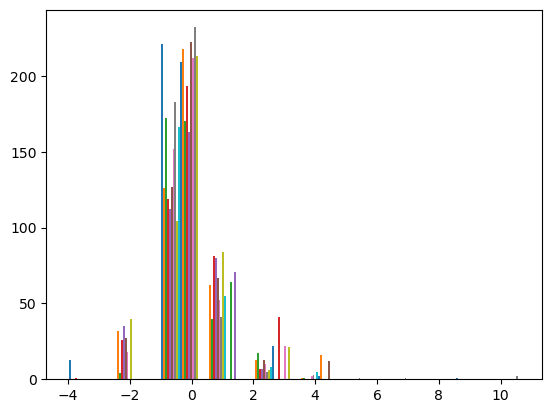

In [101]:
plt.hist(d)
plt.show()

In [102]:
from scipy.stats import zscore            #to remove the outliers from the dataset
outliers = d[(np.abs(zscore(d)) > 3).all(axis=1)]
dat = d[(np.abs(zscore(d)) <= 3).all(axis=1)]

(array([[  0.,   0.,   0.,   0., 144.,   0.,   0.,   0.,   0.,   0.],
        [  0.,  20.,  25.,  20.,  41.,  19.,  12.,   4.,   3.,   0.],
        [  0.,   1.,  26.,  56.,  31.,  16.,   5.,   5.,   3.,   1.],
        [  5.,  12.,  20.,  24.,  34.,  27.,  17.,   5.,   0.,   0.],
        [  0.,  15.,  24.,  20.,  28.,  21.,  20.,  12.,   4.,   0.],
        [  2.,   8.,  36.,  27.,  19.,  15.,  19.,  10.,   8.,   0.],
        [  0.,   5.,  38.,  34.,  29.,  18.,   8.,   8.,   3.,   1.],
        [  0.,   0.,   0.,  86.,  29.,  13.,   8.,   4.,   3.,   1.],
        [  0.,  20.,  22.,  23.,  22.,  17.,  22.,  16.,   2.,   0.],
        [  0.,   0.,  70.,   0.,  44.,  19.,  11.,   0.,   0.,   0.],
        [  0.,   0.,   0., 130.,   0.,   0.,   0.,   0.,  14.,   0.],
        [  0.,   0.,   0., 144.,   0.,   0.,   0.,   0.,   0.,   0.],
        [  0.,   0.,   0., 115.,   0.,   0.,   0.,  29.,   0.,   0.],
        [  0.,   0.,   0., 106.,   0.,   0.,   0.,   0.,  38.,   0.],
        [  0.,   0.,

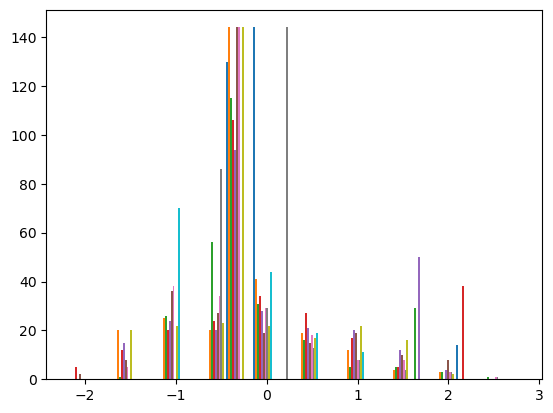

In [103]:
plt.hist(dat)

In [104]:
dataa = pd.DataFrame(dat,columns=['credit.policy', 'int.rate', 'installment', 'log.annual.inc', 'dti',
       'fico', 'days.with.cr.line', 'revol.bal', 'revol.util',
       'inq.last.6mths', 'delinq.2yrs', 'pub.rec', 'not.fully.paid',
       'purpose_credit_card', 'purpose_debt_consolidation',
       'purpose_educational', 'purpose_home_improvement',
       'purpose_major_purchase', 'purpose_small_business'])

In [72]:
dataa

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,0.242536,0.023972,-0.127006,0.109971,0.584207,-0.260832,-0.697557,0.637024,1.165211,-0.788338,-0.302061,-0.270914,-0.613572,2.169635,-0.659987,-0.232495,-0.322139,-0.092848,-0.313993
1,0.242536,1.237507,0.602961,-0.894800,0.184851,-0.848834,-0.001460,-0.531271,-0.582167,-0.092221,-0.302061,-0.270914,-0.613572,-0.460907,1.515181,-0.232495,-0.322139,-0.092848,-0.313993
2,0.242536,-0.243345,-0.473878,0.490333,-0.345122,-0.143231,-0.718990,0.638731,1.045528,-0.092221,-0.302061,-0.270914,-0.613572,-0.460907,1.515181,-0.232495,-0.322139,-0.092848,-0.313993
3,0.242536,1.530283,-0.786736,0.418484,0.686298,-1.201636,-0.231350,-0.483588,-0.106853,-0.788338,2.054015,-0.270914,-0.613572,2.169635,-0.659987,-0.232495,-0.322139,-0.092848,-0.313993
4,0.242536,-1.176834,-0.669796,1.276625,0.988067,0.209570,0.501887,1.303735,0.286393,-0.788338,-0.302061,-0.270914,-0.613572,2.169635,-0.659987,-0.232495,-0.322139,-0.092848,-0.313993
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139,0.242536,-0.434286,0.361236,0.571376,-1.070268,0.327171,-0.354848,-0.319238,-0.920700,1.300014,-0.302061,-0.270914,1.629801,-0.460907,-0.659987,-0.232495,-0.322139,-0.092848,-0.313993
140,0.242536,0.796222,-0.659002,-0.003519,1.462490,-0.731234,-0.204919,0.409511,0.994235,-0.092221,-0.302061,-0.270914,1.629801,-0.460907,-0.659987,-0.232495,-0.322139,-0.092848,-0.313993
141,0.242536,-0.434286,0.361236,-0.986307,0.822919,1.032774,-0.386990,-0.491658,-0.308605,-0.788338,-0.302061,-0.270914,1.629801,-0.460907,1.515181,-0.232495,-0.322139,-0.092848,-0.313993
142,0.242536,-1.125916,-0.338667,0.602600,-0.800027,0.797573,1.231153,0.161434,-0.110272,-0.788338,-0.302061,-0.270914,1.629801,-0.460907,1.515181,-0.232495,-0.322139,-0.092848,-0.313993


In [73]:
final_data

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,0,1,0,0,0,0
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0,1,0,0,0,0,0
2,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,0,1,0,0,0,0
3,1,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,0,1,0,0,0,0
4,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
229,1,0.1253,127.18,11.002100,20.14,687,4140.041667,27759,71.7,1,0,0,1,0,0,0,0,0,0
230,1,0.1158,264.11,10.341484,6.89,712,5670.041667,11025,55.1,1,0,1,1,1,0,0,0,0,0
231,1,0.0963,320.95,10.308953,15.88,762,3630.000000,4532,33.6,0,0,0,1,0,1,0,0,0,0
232,1,0.0800,188.02,11.429587,5.07,752,8162.958333,21365,39.4,0,0,0,1,0,1,0,0,0,0
